# Script para segmentar los audios dada una carpeta

La idea es crear un script en donde se debe indicar dónde se encuentra la carpeta Audios que debe tener la siguiente estructura (las carpetas superiores pueden ser diferentes, pero dentro de una carpeta debe haber audios y un archivo excel con las anotaciones).

Propuesta de estructura para el proyecto:

```
Audios/
├── TargetFolder/
│   ├── channelA_YYYY_MM_DD_HH_mm_SS.wav
│   ├── channelA_YYYY_MM_DD_HH_mm_SS.wav
│   ├── channelA_YYYY_MM_DD_HH_mm_SS.wav
│   ├── channelA_YYYY_MM_DD_HH_mm_SS.wav
│   └── ...
└── ...
CSVs/
├── TargetCSV.csv
└── ...

```

El código a continuación está hecho sobre la carpeta test pasada, yendo directamente desde el path de cada archivo excel. Se ha tenido que procesar cada excel para extraer la información como era necesario. Para automatizarlo los datos deben estar de forma más robusta y sin errores. Al final hay consejos de mejora.

# Pasar Excel a CSV y formato corregido

## Importar Librerías necesarias

In [1]:
import pandas as pd

## Convertir Excel a CSV

Primero vamos a convertir el Excel a un formato CSV con los datos necesarios, así es más fácil manejar el conjunto de datos. La estructura que voy a crear es la que suelo usar, no es mejor ni peor, es el tipo a la que tengo costumbre.

In [2]:
# Read CSV file in Ruidos Varios folder
csv_path = "../Dataset/CSVs/Unificados.csv"
df = pd.read_csv(csv_path)

Hemos cargado el excel como un dataframe, vamos a visualizarlo:

In [3]:
df

,Year,Month,Day,Hour,Minute,Second,AlturaSignifOleajeHm0__m,AlturaSignif_CrucePorCeroH1_3__m,PeriodoMedioS,PeriodoMedioTm02_s,...,CLICK,UNKNOWN1,UNKNOWN2200Hz,UNKNOWN3_BUBBLE_1kHz,UNKNOWN4_GOLPE__150Hz,UNKNOWN5_INTERMITENTE_,UNKNOWN6_PINPON_,UNKNOWN7_EXPLOSI_N_,UNKNOWN8_OLEAJE_,NOTAS
0,2024,5,27,23,59,0,0.43,0.39,5.0,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,5,27,23,59,1,0.43,0.39,5.0,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,5,27,23,59,2,0.43,0.39,5.0,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,5,27,23,59,3,0.43,0.39,5.0,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,5,27,23,59,4,0.43,0.39,5.0,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172915,2024,5,30,0,0,55,0.86,0.84,3.5,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172916,2024,5,30,0,0,56,0.86,0.84,3.5,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172917,2024,5,30,0,0,57,0.86,0.84,3.5,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172918,2024,5,30,0,0,58,0.86,0.84,3.5,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'AlturaSignifOleajeHm0__m', 'AlturaSignif_CrucePorCeroH1_3__m',
       'PeriodoMedioS', 'PeriodoMedioTm02_s', 'PeriodoPicoS',
       'AlturaM_ximaOleajeM', 'PeriodoOlaMaximaS', 'CanalObtencionDatos',
       'DirecMediaProced0N_90E', 'DirecMediaPicoEspectral0N_90E',
       'Dispersi_nAngularEnTodaLaBandaResueltaGrados',
       'Dispersi_nAngularEnElPicoDeEnerg_aaEspectralGrados',
       'CanalObtencionDatos1', 'Temp_Agua_C', 'CanalObtencionDatos2',
       'Vel_VientoM_s', 'Vel_M_xVientoM_s', 'DirecProcedViento0N_90E',
       'DirecProcedVientoM_x0N_90E', 'SPLMax', 'SPLPeak', 'SPLMin', 'Perc1_',
       'Perc5_', 'Perc50_', 'Perc95_', 'Perc99_', 'SPLMean', 'SPLStd',
       'SPL25Hz', 'SPL32Hz', 'SPL40Hz', 'SPL50Hz', 'SPL63Hz', 'SPL79Hz',
       'SPL100Hz', 'SPL126Hz', 'SPL158Hz', 'SPL200Hz', 'SPL251Hz', 'SPL316Hz',
       'SPL400Hz', 'SPL501Hz', 'SPL631Hz', 'SPL794Hz', 'SPL1000Hz',
       'SPL1259Hz', 'SPL1585Hz', 'SPL1995H

In [5]:
# Drop columns that are not needed

df.drop(['AlturaSignifOleajeHm0__m', 'AlturaSignif_CrucePorCeroH1_3__m',
       'PeriodoMedioS', 'PeriodoMedioTm02_s', 'PeriodoPicoS',
       'AlturaM_ximaOleajeM', 'PeriodoOlaMaximaS', 'CanalObtencionDatos',
       'DirecMediaProced0N_90E', 'DirecMediaPicoEspectral0N_90E',
       'Dispersi_nAngularEnTodaLaBandaResueltaGrados',
       'Dispersi_nAngularEnElPicoDeEnerg_aaEspectralGrados',
       'CanalObtencionDatos1', 'Temp_Agua_C', 'CanalObtencionDatos2',
       'Vel_VientoM_s', 'Vel_M_xVientoM_s', 'DirecProcedViento0N_90E',
       'DirecProcedVientoM_x0N_90E', 'SPLMax', 'SPLPeak', 'SPLMin', 'Perc1_',
       'Perc5_', 'Perc50_', 'Perc95_', 'Perc99_', 'SPLMean', 'SPLStd',
       'SPL25Hz', 'SPL32Hz', 'SPL40Hz', 'SPL50Hz', 'SPL63Hz', 'SPL79Hz',
       'SPL100Hz', 'SPL126Hz', 'SPL158Hz', 'SPL200Hz', 'SPL251Hz', 'SPL316Hz',
       'SPL400Hz', 'SPL501Hz', 'SPL631Hz', 'SPL794Hz', 'SPL1000Hz',
       'SPL1259Hz', 'SPL1585Hz', 'SPL1995Hz', 'SPL2512Hz', 'SPL3162Hz',
       'SPL3981Hz', 'SPL5012Hz', 'SPL6310Hz', 'SPL7943Hz', 'SPL10000Hz',
       'SPL12589Hz', 'SPL15849Hz', 'SPL19953Hz', 'FrecPico_Hz_','NOTAS'], axis=1, inplace=True)

In [6]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'SecondAudio',
       'Breath1KHz', 'Whistle', 'Golpe', 'Batida', 'BatidaClicks',
       'BatidaClicksR_pida_cascabel_', 'Toque', 'Embarcaci_nLejana',
       'Embarcaci_nCercana', 'CLICK', 'UNKNOWN1', 'UNKNOWN2200Hz',
       'UNKNOWN3_BUBBLE_1kHz', 'UNKNOWN4_GOLPE__150Hz',
       'UNKNOWN5_INTERMITENTE_', 'UNKNOWN6_PINPON_', 'UNKNOWN7_EXPLOSI_N_',
       'UNKNOWN8_OLEAJE_'],
      dtype='object')

Hay "errores" en el formato del nombre de las columnas, vamos a cambiarlo ya que podría dar problemas más tarde para procesarlo

In [7]:
# rename
df.rename(columns={"BatidaClicksR_pida_cascabel_": "BatidaClicksRapidaCascabel"}, inplace=True)
df.rename(columns={"Embarcaci_nLejana": "EmbarcacionLejana"}, inplace=True)
df.rename(columns={"Embarcaci_nCercana": "EmbarcacionCercana"}, inplace=True)
df.rename(columns={"UNKNOWN4_GOLPE__150Hz": "UNKNOWN4_GOLPE_150Hz"}, inplace=True)
df.rename(columns={"UNKNOWN5_INTERMITENTE_": "UNKNOWN5_INTERMITENTE"}, inplace=True)
df.rename(columns={"UNKNOWN6_PINPON_": "UNKNOWN6_PINPON"}, inplace=True)
df.rename(columns={"UNKNOWN7_EXPLOSI_N_": "UNKNOWN7_EXPLOSION"}, inplace=True)
df.rename(columns={"UNKNOWN8_OLEAJE_": "UNKNOWN8_OLEAJE"}, inplace=True)

In [8]:
df

,Year,Month,Day,Hour,Minute,Second,SecondAudio,Breath1KHz,Whistle,Golpe,...,EmbarcacionCercana,CLICK,UNKNOWN1,UNKNOWN2200Hz,UNKNOWN3_BUBBLE_1kHz,UNKNOWN4_GOLPE_150Hz,UNKNOWN5_INTERMITENTE,UNKNOWN6_PINPON,UNKNOWN7_EXPLOSION,UNKNOWN8_OLEAJE
0,2024,5,27,23,59,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,5,27,23,59,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,5,27,23,59,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,5,27,23,59,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,5,27,23,59,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172915,2024,5,30,0,0,55,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172916,2024,5,30,0,0,56,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172917,2024,5,30,0,0,57,33.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172918,2024,5,30,0,0,58,34.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# delete first 23 rows
df = df[24:]

In [10]:
df

,Year,Month,Day,Hour,Minute,Second,SecondAudio,Breath1KHz,Whistle,Golpe,...,EmbarcacionCercana,CLICK,UNKNOWN1,UNKNOWN2200Hz,UNKNOWN3_BUBBLE_1kHz,UNKNOWN4_GOLPE_150Hz,UNKNOWN5_INTERMITENTE,UNKNOWN6_PINPON,UNKNOWN7_EXPLOSION,UNKNOWN8_OLEAJE
24,2024,5,27,23,59,24,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2024,5,27,23,59,25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2024,5,27,23,59,26,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2024,5,27,23,59,27,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2024,5,27,23,59,28,4.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172915,2024,5,30,0,0,55,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172916,2024,5,30,0,0,56,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172917,2024,5,30,0,0,57,33.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172918,2024,5,30,0,0,58,34.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Es muy útil tener una columna con el path del archivo al que se refiere cada columna, como el archivo contiene la propia fecha y hora, se puede crear fácilmente de forma sintética, vamos a crearlo:

In [11]:
# Year, Month, Day, Hour, Minute, Second are integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Hour'] = df['Hour'].astype(int)
df['Minute'] = df['Minute'].astype(int)
df['Second'] = df['Second'].astype(int)

/tmp/ipykernel_76070/1183810606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)
/tmp/ipykernel_76070/1183810606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype(int)
/tmp/ipykernel_76070/1183810606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [12]:
# reset index
df = df.reset_index(drop=True)

In [13]:
df[:60]

,Year,Month,Day,Hour,Minute,Second,SecondAudio,Breath1KHz,Whistle,Golpe,...,EmbarcacionCercana,CLICK,UNKNOWN1,UNKNOWN2200Hz,UNKNOWN3_BUBBLE_1kHz,UNKNOWN4_GOLPE_150Hz,UNKNOWN5_INTERMITENTE,UNKNOWN6_PINPON,UNKNOWN7_EXPLOSION,UNKNOWN8_OLEAJE
0,2024,5,27,23,59,24,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,5,27,23,59,25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,5,27,23,59,26,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,5,27,23,59,27,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,5,27,23,59,28,4.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024,5,27,23,59,29,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024,5,27,23,59,30,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024,5,27,23,59,31,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024,5,27,23,59,32,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024,5,27,23,59,33,9.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# unique Class
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'SecondAudio',
       'Breath1KHz', 'Whistle', 'Golpe', 'Batida', 'BatidaClicks',
       'BatidaClicksRapidaCascabel', 'Toque', 'EmbarcacionLejana',
       'EmbarcacionCercana', 'CLICK', 'UNKNOWN1', 'UNKNOWN2200Hz',
       'UNKNOWN3_BUBBLE_1kHz', 'UNKNOWN4_GOLPE_150Hz', 'UNKNOWN5_INTERMITENTE',
       'UNKNOWN6_PINPON', 'UNKNOWN7_EXPLOSION', 'UNKNOWN8_OLEAJE'],
      dtype='object')

In [15]:
import pandas as pd

# Ensure Year, Month, Day, Hour, Minute, Second are integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Hour'] = df['Hour'].astype(int)
df['Minute'] = df['Minute'].astype(int)
df['Second'] = df['Second'].astype(int)

# create DateTime column
df["DateTime"] = df.apply(
    lambda row: pd.Timestamp(
        year=row['Year'].astype(int), month=row['Month'].astype(int), day=row['Day'].astype(int),
        hour=row['Hour'].astype(int), minute=row['Minute'].astype(int), second=row['Second'].astype(int)
    ), axis=1
)

# create PathDatetime column
df["PathDatetime"] = df.apply(
    lambda row: (
        pd.Timestamp(
            year=row['Year'], month=row['Month'], day=row['Day'],
            hour=row['Hour'], minute=row['Minute'], second=row['Second']
        ) if row['Second'] >= 24 
        else pd.Timestamp(
            year=row['Year'], month=row['Month'], day=row['Day'],
            hour=row['Hour'], minute=row['Minute'], second=row['Second']
        ) - pd.Timedelta(minutes=1)
    ), axis=1
)

# create Path column
df["Path"] = df.apply(
    lambda row: f"channelA_{row['PathDatetime'].year}-{str(row['PathDatetime'].month).zfill(2)}-{str(row['PathDatetime'].day).zfill(2)}_{str(row['PathDatetime'].hour).zfill(2)}-{str(row['PathDatetime'].minute).zfill(2)}-24.wav",
    axis=1
)

In [16]:
# check if all Path exists in folder Dataset/Audio/Full
import os
audio_folder = "../Dataset/Audios/Full"
audio_files = os.listdir(audio_folder)
audio_files = [file for file in audio_files if file.endswith(".wav")]

count = 0
current_audio_count = 0
current_path = ""

for index, row in df.iterrows():
    if count == 0:
        current_path = row["Path"]
    if row["Path"] != current_path:
        if current_audio_count != 60:
            print("[" + str(count) + "]: " + current_path + " has " + str(current_audio_count) + " files")
        current_path = row["Path"]
        current_audio_count = 0

    if row["Path"] not in audio_files:
        print("[" + str(count) + "]: File " + row["Path"] + " does not exist")
    else:
        current_audio_count += 1

    count += 1

En pasos posteriores hemos visto que había un error en la generación del path cuando el minuto es 0 (-1), hemos corregido la función arriba y para asegurar visualizamos que hay 60 instancias por path

In [17]:
# See unique values of column Path
df["Path"].unique()

array(['channelA_2024-05-27_23-59-24.wav',
       'channelA_2024-05-28_00-00-24.wav',
       'channelA_2024-05-28_00-01-24.wav', ...,
       'channelA_2024-05-29_23-58-24.wav',
       'channelA_2024-05-29_23-59-24.wav',
       'channelA_2024-05-30_00-00-24.wav'], dtype=object)

Podemos poner un assert para asegurar que todas tienen 60 instancias, sino daría error y no se termina de ejecutar el codigo

In [18]:
# # Assert there are 60 rows per path
# assert all(df["Path"].value_counts() == 60), "Not all paths have 60 rows"

In [19]:
# Count Number of rows per Path
df["Path"].value_counts()

Path
channelA_2024-05-27_23-59-24.wav    60
channelA_2024-05-29_07-53-24.wav    60
channelA_2024-05-29_07-55-24.wav    60
channelA_2024-05-29_07-56-24.wav    60
channelA_2024-05-29_07-57-24.wav    60
                                    ..
channelA_2024-05-28_16-01-24.wav    60
channelA_2024-05-28_16-02-24.wav    60
channelA_2024-05-28_16-03-24.wav    60
channelA_2024-05-28_16-04-24.wav    60
channelA_2024-05-30_00-00-24.wav    36
Name: count, Length: 2882, dtype: int64

In [20]:
# Check Path channelA_2024-05-28_05--1-24.wav
df[df["Path"] == "channelA_2024-05-30_00-00-24.wav"]

,Year,Month,Day,Hour,Minute,Second,SecondAudio,Breath1KHz,Whistle,Golpe,...,UNKNOWN2200Hz,UNKNOWN3_BUBBLE_1kHz,UNKNOWN4_GOLPE_150Hz,UNKNOWN5_INTERMITENTE,UNKNOWN6_PINPON,UNKNOWN7_EXPLOSION,UNKNOWN8_OLEAJE,DateTime,PathDatetime,Path
172860,2024,5,30,0,0,24,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:24,2024-05-30 00:00:24,channelA_2024-05-30_00-00-24.wav
172861,2024,5,30,0,0,25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:25,2024-05-30 00:00:25,channelA_2024-05-30_00-00-24.wav
172862,2024,5,30,0,0,26,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:26,2024-05-30 00:00:26,channelA_2024-05-30_00-00-24.wav
172863,2024,5,30,0,0,27,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:27,2024-05-30 00:00:27,channelA_2024-05-30_00-00-24.wav
172864,2024,5,30,0,0,28,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:28,2024-05-30 00:00:28,channelA_2024-05-30_00-00-24.wav
172865,2024,5,30,0,0,29,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:29,2024-05-30 00:00:29,channelA_2024-05-30_00-00-24.wav
172866,2024,5,30,0,0,30,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:30,2024-05-30 00:00:30,channelA_2024-05-30_00-00-24.wav
172867,2024,5,30,0,0,31,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:31,2024-05-30 00:00:31,channelA_2024-05-30_00-00-24.wav
172868,2024,5,30,0,0,32,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:32,2024-05-30 00:00:32,channelA_2024-05-30_00-00-24.wav
172869,2024,5,30,0,0,33,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30 00:00:33,2024-05-30 00:00:33,channelA_2024-05-30_00-00-24.wav


In [21]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'SecondAudio',
       'Breath1KHz', 'Whistle', 'Golpe', 'Batida', 'BatidaClicks',
       'BatidaClicksRapidaCascabel', 'Toque', 'EmbarcacionLejana',
       'EmbarcacionCercana', 'CLICK', 'UNKNOWN1', 'UNKNOWN2200Hz',
       'UNKNOWN3_BUBBLE_1kHz', 'UNKNOWN4_GOLPE_150Hz', 'UNKNOWN5_INTERMITENTE',
       'UNKNOWN6_PINPON', 'UNKNOWN7_EXPLOSION', 'UNKNOWN8_OLEAJE', 'DateTime',
       'PathDatetime', 'Path'],
      dtype='object')

In [22]:
# Resort columns: Path	DateTime	PathDatetime Year	Month	Day	Hour	Minute	Second	SecondAudio	Breath1KHz	Whistle	Golpe	...	UNKNOWN2200Hz	UNKNOWN3_BUBBLE_1kHz	UNKNOWN4_GOLPE_150Hz	UNKNOWN5_INTERMITENTE	UNKNOWN6_PINPON	UNKNOWN7_EXPLOSION	UNKNOWN8_OLEAJE
df = df[['Path', 'DateTime', 'PathDatetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'SecondAudio', 'Breath1KHz', 'Whistle', 'Golpe', 'Batida', 'BatidaClicks',
       'BatidaClicksRapidaCascabel', 'Toque', 'EmbarcacionLejana',
       'EmbarcacionCercana', 'CLICK', 'UNKNOWN1', 'UNKNOWN2200Hz',
       'UNKNOWN3_BUBBLE_1kHz', 'UNKNOWN4_GOLPE_150Hz', 'UNKNOWN5_INTERMITENTE',
       'UNKNOWN6_PINPON', 'UNKNOWN7_EXPLOSION', 'UNKNOWN8_OLEAJE']]

In [23]:
df

,Path,DateTime,PathDatetime,Year,Month,Day,Hour,Minute,Second,SecondAudio,...,EmbarcacionCercana,CLICK,UNKNOWN1,UNKNOWN2200Hz,UNKNOWN3_BUBBLE_1kHz,UNKNOWN4_GOLPE_150Hz,UNKNOWN5_INTERMITENTE,UNKNOWN6_PINPON,UNKNOWN7_EXPLOSION,UNKNOWN8_OLEAJE
0,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:24,2024-05-27 23:59:24,2024,5,27,23,59,24,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:25,2024-05-27 23:59:25,2024,5,27,23,59,25,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:26,2024-05-27 23:59:26,2024,5,27,23,59,26,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:27,2024-05-27 23:59:27,2024,5,27,23,59,27,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:28,2024-05-27 23:59:28,2024,5,27,23,59,28,4.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172891,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:55,2024-05-30 00:00:55,2024,5,30,0,0,55,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172892,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:56,2024-05-30 00:00:56,2024,5,30,0,0,56,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172893,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:57,2024-05-30 00:00:57,2024,5,30,0,0,57,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172894,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:58,2024-05-30 00:00:58,2024,5,30,0,0,58,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Drop Year, Month, Day, Hour, Minute, Second columns
df.drop(columns=["Year", "Month", "Day", "Hour", "Minute", "Second"], inplace=True)

In [25]:
df

,Path,DateTime,PathDatetime,SecondAudio,Breath1KHz,Whistle,Golpe,Batida,BatidaClicks,BatidaClicksRapidaCascabel,...,EmbarcacionCercana,CLICK,UNKNOWN1,UNKNOWN2200Hz,UNKNOWN3_BUBBLE_1kHz,UNKNOWN4_GOLPE_150Hz,UNKNOWN5_INTERMITENTE,UNKNOWN6_PINPON,UNKNOWN7_EXPLOSION,UNKNOWN8_OLEAJE
0,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:24,2024-05-27 23:59:24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:25,2024-05-27 23:59:25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:26,2024-05-27 23:59:26,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:27,2024-05-27 23:59:27,3.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,channelA_2024-05-27_23-59-24.wav,2024-05-27 23:59:28,2024-05-27 23:59:28,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172891,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:55,2024-05-30 00:00:55,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172892,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:56,2024-05-30 00:00:56,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172893,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:57,2024-05-30 00:00:57,33.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172894,channelA_2024-05-30_00-00-24.wav,2024-05-30 00:00:58,2024-05-30 00:00:58,34.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora vamos a agrupar aquellas clases que tengan 1 seguido para el mismo path, cada anotación será una fila

In [26]:
df.columns

Index(['Path', 'DateTime', 'PathDatetime', 'SecondAudio', 'Breath1KHz',
       'Whistle', 'Golpe', 'Batida', 'BatidaClicks',
       'BatidaClicksRapidaCascabel', 'Toque', 'EmbarcacionLejana',
       'EmbarcacionCercana', 'CLICK', 'UNKNOWN1', 'UNKNOWN2200Hz',
       'UNKNOWN3_BUBBLE_1kHz', 'UNKNOWN4_GOLPE_150Hz', 'UNKNOWN5_INTERMITENTE',
       'UNKNOWN6_PINPON', 'UNKNOWN7_EXPLOSION', 'UNKNOWN8_OLEAJE'],
      dtype='object')

In [27]:
# Class Columns (to be used as class labels)
class_columns = ['Breath1KHz',
       'Whistle', 'Golpe', 'Batida', 'BatidaClicks',
       'BatidaClicksRapidaCascabel', 'Toque', 'EmbarcacionLejana',
       'EmbarcacionCercana', 'CLICK', 'UNKNOWN1', 'UNKNOWN2200Hz',
       'UNKNOWN3_BUBBLE_1kHz', 'UNKNOWN4_GOLPE_150Hz', 'UNKNOWN5_INTERMITENTE',
       'UNKNOWN6_PINPON', 'UNKNOWN7_EXPLOSION', 'UNKNOWN8_OLEAJE']

# DataFrame to store the results
results = []

# Process each class column
for col in class_columns:
    start_second = None
    end_second = None
    current_path = df["Path"].iloc[0]

    for i in range(len(df)):
        if df[col].iloc[i] == 1 and df["Path"].iloc[i] == current_path:
            if start_second is None:
                start_second = df["SecondAudio"].iloc[i]
            end_second = df["SecondAudio"].iloc[i]
        elif df[col].iloc[i] == 1 and df["Path"].iloc[i] != current_path:
            if start_second is not None:
                results.append({
                    "Path": current_path,
                    "StartSecond": start_second,
                    "EndSecond": end_second,
                    "Class": col
                })
            start_second = df["SecondAudio"].iloc[i]
            end_second = df["SecondAudio"].iloc[i]
            current_path = df["Path"].iloc[i]
        else:
            if start_second is not None:
                results.append({
                    "Path": current_path,
                    "StartSecond": start_second,
                    "EndSecond": end_second,
                    "Class": col
                })
                start_second = None
                end_second = None
                current_path = df["Path"].iloc[i]
    
    # If the sequence ends with a 1, add the last sequence
    if start_second is not None:
        results.append({
            "Path": df["Path"].iloc[-1],  # Last Path
            "StartSecond": start_second,
            "EndSecond": end_second,
            "Class": col
        })

# Convert results to DataFrame
result_df = pd.DataFrame(results)

result_df

,Path,StartSecond,EndSecond,Class
0,channelA_2024-05-27_23-59-24.wav,3.0,3.0,Breath1KHz
1,channelA_2024-05-27_23-59-24.wav,9.0,10.0,Breath1KHz
2,channelA_2024-05-27_23-59-24.wav,14.0,15.0,Breath1KHz
3,channelA_2024-05-27_23-59-24.wav,40.0,42.0,Breath1KHz
4,channelA_2024-05-27_23-59-24.wav,53.0,53.0,Breath1KHz
...,...,...,...,...
1217,channelA_2024-05-29_05-25-24.wav,2.0,4.0,UNKNOWN7_EXPLOSION
1218,channelA_2024-05-29_05-25-24.wav,36.0,38.0,UNKNOWN7_EXPLOSION
1219,channelA_2024-05-29_05-25-24.wav,43.0,44.0,UNKNOWN7_EXPLOSION
1220,channelA_2024-05-28_20-02-24.wav,12.0,13.0,UNKNOWN8_OLEAJE


In [28]:
# Check if there are rows with StartSecond > EndSecond
result_df[result_df["StartSecond"] > result_df["EndSecond"]]

,Path,StartSecond,EndSecond,Class


In [29]:
# Sort results by path
result_df.sort_values(by=["Path", "StartSecond", "EndSecond"], inplace=True)

In [30]:
# Visualizar anotaciones de un audio concreto
result_df[result_df["Path"] == "channelA_2024-05-28_04-57-24.wav"]

,Path,StartSecond,EndSecond,Class
660,channelA_2024-05-28_04-57-24.wav,0.0,59.0,EmbarcacionLejana
461,channelA_2024-05-28_04-57-24.wav,33.0,34.0,Toque
84,channelA_2024-05-28_04-57-24.wav,42.0,44.0,Breath1KHz


Comprobamos de manera manual que para ese audio esas son las anotaciones (se superponen varias clases y hay una que dura el minuto completo, se ha procesado bien)

Guardamos CSV y podemos empezar a procesar los audios y segmentarlos

In [31]:
# Save CSV
result_df.to_csv("../Dataset/CSVs/Dataset.csv", index=False)

# Segmentar Audios

## Librerías

In [32]:
import os
import pandas as pd
from pydub import AudioSegment

In [33]:
# Process csv to segment audios and put in class folder
csv_path = "../Dataset/CSVs/Dataset.csv"
df = pd.read_csv(csv_path)
results_df = pd.DataFrame(columns=["SegmentedAudioPath", "OriginalAudioPath", "StartSecond", "EndSecond", "StartSample", "EndSample", "Class"])

# Frecuencia de muestreo
Fs = 256000  # Hz

# Create folder for each class
class_columns = df["Class"].unique()
for col in class_columns:
    class_folder = f"../Dataset/Audios/SegmentedAudios/{col}"
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

# Process each row
for index, row in df.iterrows():
    # Load audio
    audio_path = f"../Dataset/Audios/Full/{row['Path']}"
    audio = AudioSegment.from_wav(audio_path)
    
    # Segment audio
    start_sample = int(Fs * row['StartSecond'] + 1)  # Convertir a muestras
    end_sample = int(Fs * (row['EndSecond'] + 1))  # Convertir a muestras
    audio_class = row['Class']

    # Cargar el audio
    audio = AudioSegment.from_wav(audio_path)

    # start_sample y end_sample to miliseconds
    startmilisecond = start_sample / Fs * 1000
    endmilisecond = end_sample / Fs * 1000

    # Extraer el segmento
    audio_segment = audio[startmilisecond:endmilisecond]

    class_folder = f"../Dataset/Audios/SegmentedAudios/{audio_class}"
    
    # Save audio
    segment_filename = f"{row['Path'].split(".")[0]}_{row['StartSecond']}_{row['EndSecond']}.wav"
    segment_path = os.path.join(class_folder, segment_filename)
    audio_segment.export(segment_path, format="wav")

    # New row
    new_row = pd.DataFrame({
        "SegmentedAudioPath": [segment_path],
        "OriginalAudioPath": [audio_path],
        "StartSecond": [row['StartSecond']],
        "EndSecond": [row['EndSecond']],
        "StartSample": [start_sample],
        "EndSample": [end_sample],
        "Class": [audio_class]
    })

    results_df = pd.concat([results_df, new_row], ignore_index=True)


# Save results to CSV
results_df.to_csv("../Dataset/CSVs/SegmentedDataset.csv", index=False)

/tmp/ipykernel_76070/1788082667.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [34]:
# Check number of files in each class folder
for col in class_columns:
    class_folder = f"../Dataset/Audios/SegmentedAudios/{col}"
    files = os.listdir(class_folder)
    print(f"{col}: {len(files)}")

Breath1KHz: 208
CLICK: 317
UNKNOWN3_BUBBLE_1kHz: 27
UNKNOWN1: 1
Golpe: 43
EmbarcacionLejana: 76
EmbarcacionCercana: 19
UNKNOWN7_EXPLOSION: 10
UNKNOWN4_GOLPE_150Hz: 129
Toque: 234
Whistle: 73
Batida: 27
BatidaClicks: 35
BatidaClicksRapidaCascabel: 10
UNKNOWN2200Hz: 5
UNKNOWN5_INTERMITENTE: 1
UNKNOWN6_PINPON: 5
UNKNOWN8_OLEAJE: 2


# Create Dataset and Splits

## Split

In [35]:
df

,Path,StartSecond,EndSecond,Class
0,channelA_2024-05-27_23-59-24.wav,3.0,3.0,Breath1KHz
1,channelA_2024-05-27_23-59-24.wav,4.0,4.0,CLICK
2,channelA_2024-05-27_23-59-24.wav,9.0,10.0,Breath1KHz
3,channelA_2024-05-27_23-59-24.wav,13.0,13.0,CLICK
4,channelA_2024-05-27_23-59-24.wav,14.0,15.0,Breath1KHz
...,...,...,...,...
1217,channelA_2024-05-29_23-33-24.wav,0.0,1.0,Breath1KHz
1218,channelA_2024-05-29_23-33-24.wav,15.0,16.0,Toque
1219,channelA_2024-05-29_23-33-24.wav,29.0,33.0,Toque
1220,channelA_2024-05-29_23-33-24.wav,35.0,36.0,Breath1KHz


In [36]:
# Split Dataset CSV in Train, Validation and Test (80-10-10)
import pandas as pd
import numpy as np
import os

# Load Segmented Dataset
csv_path = "../Dataset/CSVs/SegmentedDataset.csv"
df = pd.read_csv(csv_path)

In [37]:
df

,SegmentedAudioPath,OriginalAudioPath,StartSecond,EndSecond,StartSample,EndSample,Class
0,../Dataset/Audios/SegmentedAudios/Breath1KHz/c...,../Dataset/Audios/Full/channelA_2024-05-27_23-...,3.0,3.0,768001,1024000,Breath1KHz
1,../Dataset/Audios/SegmentedAudios/CLICK/channe...,../Dataset/Audios/Full/channelA_2024-05-27_23-...,4.0,4.0,1024001,1280000,CLICK
2,../Dataset/Audios/SegmentedAudios/Breath1KHz/c...,../Dataset/Audios/Full/channelA_2024-05-27_23-...,9.0,10.0,2304001,2816000,Breath1KHz
3,../Dataset/Audios/SegmentedAudios/CLICK/channe...,../Dataset/Audios/Full/channelA_2024-05-27_23-...,13.0,13.0,3328001,3584000,CLICK
4,../Dataset/Audios/SegmentedAudios/Breath1KHz/c...,../Dataset/Audios/Full/channelA_2024-05-27_23-...,14.0,15.0,3584001,4096000,Breath1KHz
...,...,...,...,...,...,...,...
1217,../Dataset/Audios/SegmentedAudios/Breath1KHz/c...,../Dataset/Audios/Full/channelA_2024-05-29_23-...,0.0,1.0,1,512000,Breath1KHz
1218,../Dataset/Audios/SegmentedAudios/Toque/channe...,../Dataset/Audios/Full/channelA_2024-05-29_23-...,15.0,16.0,3840001,4352000,Toque
1219,../Dataset/Audios/SegmentedAudios/Toque/channe...,../Dataset/Audios/Full/channelA_2024-05-29_23-...,29.0,33.0,7424001,8704000,Toque
1220,../Dataset/Audios/SegmentedAudios/Breath1KHz/c...,../Dataset/Audios/Full/channelA_2024-05-29_23-...,35.0,36.0,8960001,9472000,Breath1KHz


In [38]:
# Split proportions
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

In [39]:
# Group annotations by species
grouped_by_classes = df.groupby('Class')

# Initialize empty DataFrames for train, validation, and test sets
train_df = pd.DataFrame()
validation_df = pd.DataFrame()
test_df = pd.DataFrame()

# Iterate over species groups
for species, group_df in grouped_by_classes:
    # Print count of annotations of current specie
    specie_count = group_df.shape[0]

    train_count = int(specie_count * train_ratio)
    val_count = int(specie_count * val_ratio)
    test_count = int(specie_count * test_ratio)

    # Group annotations within species by path
    grouped_by_path = group_df.groupby('OriginalAudioPath')

    # Initialize empty DataFrames for species annotations within each path
    train_df_path = pd.DataFrame()
    val_df_path = pd.DataFrame()
    test_df_path = pd.DataFrame()

    # Order groups by path from smallest to largest 
    # Compute group sizes
    group_sizes = group_df.groupby('OriginalAudioPath').size()

    # Sort index by group sizes
    sorted_index = group_sizes.sort_values(ascending=False).index
    number_groups = len(sorted_index)

    # Reorder DataFrame according to sorted index
    group_df = group_df.set_index('OriginalAudioPath').loc[sorted_index].reset_index()

    if number_groups <= 3:
        # Shuffle group_df
        group_df = group_df.sample(frac=1).reset_index(drop=True)
        
        train_df_path = group_df.iloc[:train_count]
        val_df_path = group_df.iloc[train_count:train_count + val_count]
        test_df_path = group_df.iloc[train_count + val_count:]
    else:
        for path, path_group_df in grouped_by_path:
            if val_df_path.shape[0] < val_count:
                val_df_path = pd.concat([val_df_path, path_group_df])
            elif test_df_path.shape[0] < test_count:
                test_df_path = pd.concat([test_df_path, path_group_df])
            else:
                train_df_path = pd.concat([train_df_path, path_group_df])
        
    # Append species annotations to respective DataFrames
    train_df = pd.concat([train_df, train_df_path])
    validation_df = pd.concat([validation_df, val_df_path])
    test_df = pd.concat([test_df, test_df_path])

In [40]:
# Ensure instances from train_df are not in validation df or test df
assert len(train_df.merge(validation_df)) == 0
assert len(train_df.merge(test_df)) == 0
assert len(validation_df.merge(test_df)) == 0

if len(train_df) + len(validation_df) + len(test_df) != len(df):
    # Concatenate train, validation, and test DataFrames
    combined_df = pd.concat([train_df, validation_df, test_df])

    # Drop duplicates to ensure uniqueness
    combined_df = combined_df.drop_duplicates()

    # Merge original DataFrame with combined DataFrame to find rows not present in train, validation, or test sets
    rows_not_in_sets = df.merge(combined_df, how='left', indicator=True)
    rows_not_in_sets = rows_not_in_sets[rows_not_in_sets['_merge'] == 'left_only']

    # Print rows not present in train, validation, or test sets
    print("Rows not present in train, validation, or test sets:")
    print(rows_not_in_sets)

In [41]:
# Save CSVs
train_df.to_csv("../Dataset/CSVs/TrainDataset.csv", index=False)
validation_df.to_csv("../Dataset/CSVs/ValidationDataset.csv", index=False)
test_df.to_csv("../Dataset/CSVs/TestDataset.csv", index=False)

<Figure size 1000x3000 with 0 Axes>

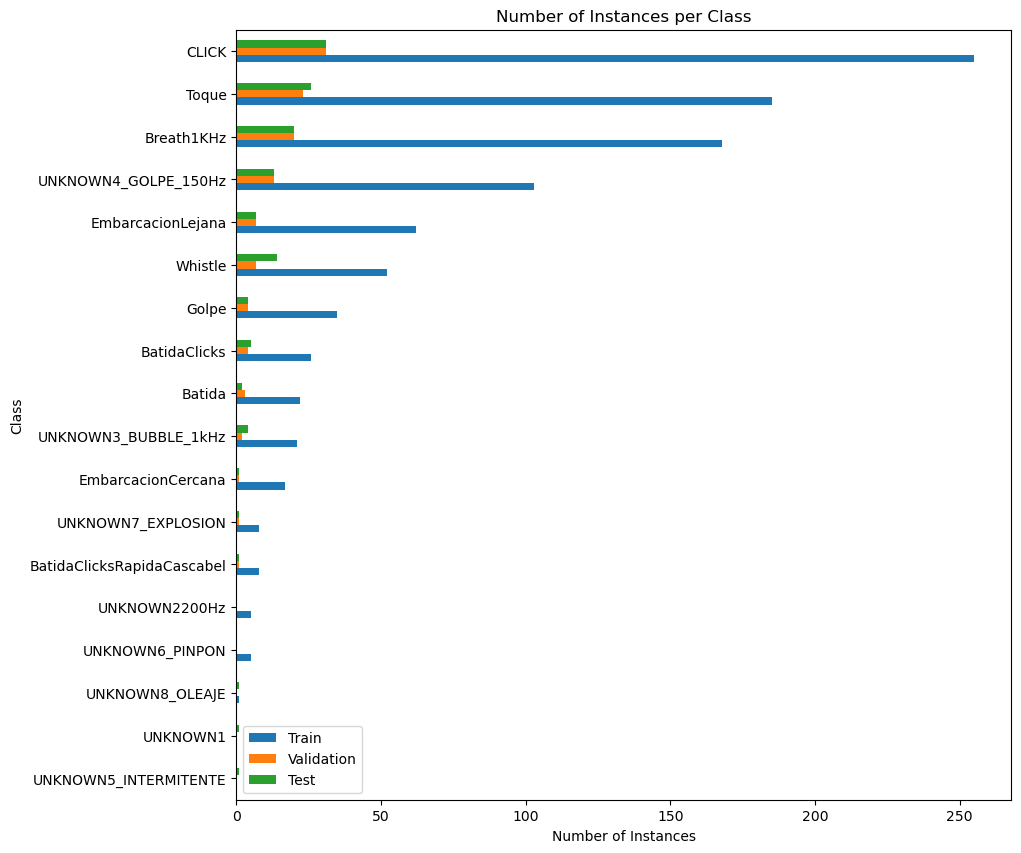

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

train_count = train_df["Class"].value_counts()
val_count = validation_df["Class"].value_counts()
test_count = test_df["Class"].value_counts()

# Combinar las cuentas en un único DataFrame para facilitar el ploteo
counts_df = pd.DataFrame({
    'Train': train_count,
    'Validation': val_count,
    'Test': test_count
}).fillna(0)  # Rellenar clases faltantes con ceros

# Crear el gráfico de barras
# plt size
plt.figure(figsize=(10, 30))
counts_df.sort_values(by='Train', ascending=True).plot(kind='barh', stacked=False, figsize=(10, 10))
plt.title('Number of Instances per Class')
plt.xlabel('Number of Instances')
plt.ylabel('Class')
plt.show()


In [92]:
# Read CSV file
csv_path = "../Dataset/CSVs/TrainDataset.csv"
train_df = pd.read_csv(csv_path)
csv_path = "../Dataset/CSVs/ValidationDataset.csv"
validation_df = pd.read_csv(csv_path)
csv_path = "../Dataset/CSVs/TestDataset.csv"
test_df = pd.read_csv(csv_path)

train_count = train_df["Class"].value_counts()
val_count = validation_df["Class"].value_counts()
test_count = test_df["Class"].value_counts()

# Combinar las cuentas en un único DataFrame para facilitar el ploteo
counts_df = pd.DataFrame({
    'Train': train_count,
    'Validation': val_count,
    'Test': test_count
}).fillna(0)  # Rellenar clases faltantes con ceros

In [93]:
# Same OriginalAudioPath in Train, Validation and Test
train_audios = train_df["OriginalAudioPath"].unique()
validation_audios = validation_df["OriginalAudioPath"].unique()
test_audios = test_df["OriginalAudioPath"].unique()

# Check if there are audios in more than one split
common_audios = np.intersect1d(train_audios, validation_audios)
common_audios = np.intersect1d(common_audios, test_audios)

print(f"Common audios: {len(common_audios)}")
print(common_audios)

Common audios: 0
[]


In [94]:
counts_df

,Train,Validation,Test
Class,,,
Batida,22.0,2.0,3.0
BatidaClicks,26.0,4.0,5.0
BatidaClicksRapidaCascabel,8.0,1.0,1.0
Breath1KHz,163.0,22.0,22.0
CLICK,238.0,38.0,41.0
EmbarcacionCercana,17.0,1.0,1.0
EmbarcacionLejana,62.0,7.0,7.0
Golpe,37.0,3.0,3.0
Toque,185.0,23.0,26.0


In [95]:
# Iterate over species groups
for species, group_df in grouped_by_classes:
    # Print count of annotations of current species
    specie_count = group_df.shape[0]

    # Calculate the expected counts for the current species based on ratios
    expected_train_count = int(specie_count * train_ratio)
    expected_val_count = int(specie_count * val_ratio)
    expected_test_count = int(specie_count * test_ratio)

    # Calculate the allowed error margin
    error_margin = 0

    # Calculate the acceptable range for each set count, rounding up
    min_train_count = int(expected_train_count * (1 - error_margin))
    max_train_count = int(expected_train_count * (1 + error_margin))

    min_val_count = int(expected_val_count * (1 - error_margin))
    max_val_count = int(expected_val_count * (1 + error_margin))

    min_test_count = int(expected_test_count * (1 - error_margin))
    max_test_count = int(expected_test_count * (1 + error_margin))

    if max_test_count <= 2: max_test_count += 2
    if max_val_count <= 2: max_val_count += 2

    # Calculate the actual counts for the current species in each set
    actual_train_count = len(train_df[train_df['Class'] == species])
    actual_val_count = len(validation_df[validation_df['Class'] == species])
    actual_test_count = len(test_df[test_df['Class'] == species])

    # Check if the actual counts fall within the acceptable range, if at more than 2 are out of range, print the species
    out_of_range = 0
    if not (min_train_count <= actual_train_count <= max_train_count):
        out_of_range += 1
    if not (min_val_count <= actual_val_count <= max_val_count):
        out_of_range += 1
    if not (min_test_count <= actual_test_count <= max_test_count):
        out_of_range += 1

    if out_of_range > 1:
        print(f"Species: {species}")
        print(f"Train count: {actual_train_count}, Expected range: [{min_train_count}, {max_train_count}]")
        print(f"Validation count: {actual_val_count}, Expected range: [{min_val_count}, {max_val_count}]")
        print(f"Test count: {actual_test_count}, Expected range: [{min_test_count}, {max_test_count}]")
        print("\n")

Species: BatidaClicks
Train count: 26, Expected range: [28, 28]
Validation count: 4, Expected range: [3, 3]
Test count: 5, Expected range: [3, 3]


Species: Breath1KHz
Train count: 163, Expected range: [166, 166]
Validation count: 22, Expected range: [20, 20]
Test count: 22, Expected range: [20, 20]


Species: CLICK
Train count: 238, Expected range: [253, 253]
Validation count: 38, Expected range: [31, 31]
Test count: 41, Expected range: [31, 31]


Species: Golpe
Train count: 37, Expected range: [34, 34]
Validation count: 3, Expected range: [4, 4]
Test count: 3, Expected range: [4, 4]


Species: Toque
Train count: 185, Expected range: [187, 187]
Validation count: 23, Expected range: [23, 23]
Test count: 26, Expected range: [23, 23]


Species: UNKNOWN3_BUBBLE_1kHz
Train count: 18, Expected range: [21, 21]
Validation count: 5, Expected range: [2, 4]
Test count: 4, Expected range: [2, 4]


Species: UNKNOWN4_GOLPE_150Hz
Train count: 103, Expected range: [103, 103]
Validation count: 11, Exp

In [96]:
# Same OriginalAudioPath in Train, Validation and Test
train_audios = train_df["OriginalAudioPath"].unique()
validation_audios = validation_df["OriginalAudioPath"].unique()
test_audios = test_df["OriginalAudioPath"].unique()

# Check if there are audios in more than one split
common_audios = np.intersect1d(train_audios, validation_audios)
common_audios = np.intersect1d(common_audios, test_audios)

print(f"Common audios: {len(common_audios)}")
print(common_audios)

Common audios: 0
[]


In [97]:
# load tran, val and test csv
train_df = pd.read_csv("../Dataset/CSVs/TrainDataset.csv")
validation_df = pd.read_csv("../Dataset/CSVs/ValidationDataset.csv")
test_df = pd.read_csv("../Dataset/CSVs/TestDataset.csv")

In [98]:
# delete rows StartSample and EndSample
train_df.drop(columns=["StartSample", "EndSample"], inplace=True)
validation_df.drop(columns=["StartSample", "EndSample"], inplace=True)
test_df.drop(columns=["StartSample", "EndSample"], inplace=True)

# save CSVs
train_df.to_csv("../Dataset/CSVs/TrainDataset.csv", index=False)
validation_df.to_csv("../Dataset/CSVs/ValidationDataset.csv", index=False)
test_df.to_csv("../Dataset/CSVs/TestDataset.csv", index=False)

In [101]:
# Move segments from SegmentedAudios to Train, Validation and Test folders
import shutil

# Load CSVs
train_df = pd.read_csv("../Dataset/CSVs/TrainDataset.csv")
validation_df = pd.read_csv("../Dataset/CSVs/ValidationDataset.csv")
test_df = pd.read_csv("../Dataset/CSVs/TestDataset.csv")

# Move segments to Train folder, recreating the class folders
for index, row in train_df.iterrows():
    # Create class folder if it doesn't exist
    class_folder = f"../Dataset/Audios/Train/{row['Class']}"
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
    
    # Move segment to class folder
    shutil.copy(row["SegmentedAudioPath"], class_folder)

# Move segments to Validation folder, recreating the class folders
for index, row in validation_df.iterrows():
    # Create class folder if it doesn't exist
    class_folder = f"../Dataset/Audios/Validation/{row['Class']}"
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
    
    # Move segment to class folder
    shutil.copy(row["SegmentedAudioPath"], class_folder)

# Move segments to Test folder, recreating the class folders
for index, row in test_df.iterrows():
    # Create class folder if it doesn't exist
    class_folder = f"../Dataset/Audios/Test/{row['Class']}"
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
    
    # Move segment to class folder
    shutil.copy(row["SegmentedAudioPath"], class_folder)